# Análise sobre Ataques Cardíacos

O dataset trata de um problema de classificação binária para prever a presença de coença cardíaca (output). Primeiro começaremos com a importação das bibliotecas utilizadas para este relatório e logo após uma breve vizualização dos dados iniciais dos dados do arquivo:


# 1 - Vizualização dos dados:


In [ ]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# 1. Carregar os dados
url = "https://raw.githubusercontent.com/rafaelnovaesbr/MVP/refs/heads/main/heart.csv"
data = pd.read_csv(url)

# Visualizar as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
print(data.head())

: 

# 2 - Separação de Conjunto de Treinos e Teste


Os dados são divididos em X (características) e y (rótulo) e, em seguida, separados em conjuntos de treino e teste com 20% dos dados para teste.

In [61]:
# 2. Separação entre treino e teste
X = data.drop("output", axis=1)
y = data["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


A separação foi realizada com ''train_test_split'', com 80% para treino e 20% para teste, preservando a estratificação da variável alvo.

# 3 - Pré-processamento:


Cria-se um pipeline para transformar variáveis numéricas (imputação de valores ausentes e padronização) e categóricas (imputação e condificação One-Hot).

In [62]:
# 3. Pipeline de pré-processamento
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object", "category"]).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4 - Modelos e Pipelines:

São configurados modelos clássicos de classificação como: Logistic Regression, K-Nearest Neighbors e Random Forest. Cada modelo é integrado a um pipeline que inclui o pré-processamento.

In [63]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

pipelines = {name: Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
             for name, model in models.items()}

Os algoritmos escolhidos foram: Regressão Logística, KNN e Floresta Aletórica por conta da abordagem diversificada entre modelos lineares e não-lineares. Um outro método que pode ser implementado seria o VotingClassifier para melhoria dos métodos.

# 5 - Otimização de Hiperparâmetros:


GridSearchCV é usado para buscar os melhores hiperparâmetros para cada modelo, com validação cruzada de 5 folds para exploração combinação de hiperparâmetros.

In [64]:
param_grids = {
    "Logistic Regression": {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']
    },
    "K-Nearest Neighbors": {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    "Random Forest": {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20]
    }
}

# 6 - Avaliação:


Os modelos otimizados são avalizados no conjunto de teste com métricas como acurácia e relatório de classificação.

In [65]:
print("\nResultados no conjunto de teste:")
for model_name, model in best_estimators.items():
    print(f"\n{model_name}:")
    y_pred = model.predict(X_test)
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


Resultados no conjunto de teste:

Logistic Regression:
Acurácia: 0.7705
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        28
           1       0.74      0.88      0.81        33

    accuracy                           0.77        61
   macro avg       0.78      0.76      0.76        61
weighted avg       0.78      0.77      0.77        61


K-Nearest Neighbors:
Acurácia: 0.8197
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61


Random Forest:
Acurácia: 0.8197
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                         

# 7 - Vizualização dos Resultados:


Aqui apenas temos uma vizualização simples dos resultados comparados.

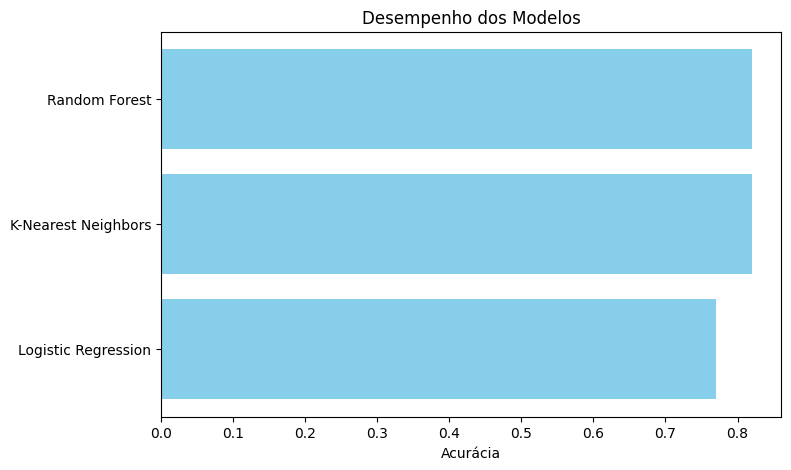

In [66]:
import matplotlib.pyplot as plt

# Comparar métricas de desempenho
model_results = []
model_names = []
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    model_results.append(accuracy_score(y_test, y_pred))
    model_names.append(model_name)

# Criar gráfico de barras
plt.figure(figsize=(8, 5))
plt.barh(model_names, model_results, color='skyblue')
plt.xlabel('Acurácia')
plt.title('Desempenho dos Modelos')
plt.show()

# 8 - Melhorias com curvas de Aprendizado:


Plotando curva de aprendizado para Logistic Regression...


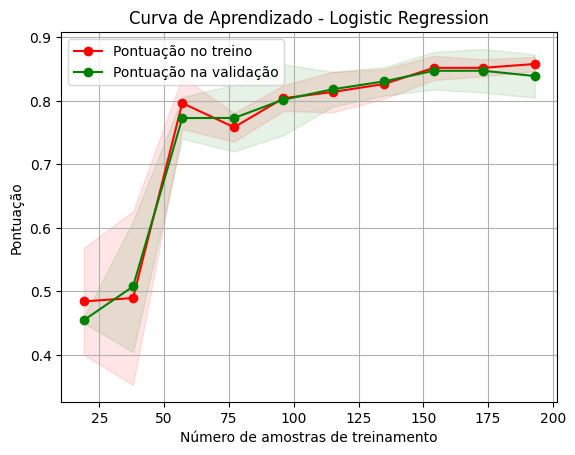

Plotando curva de aprendizado para K-Nearest Neighbors...


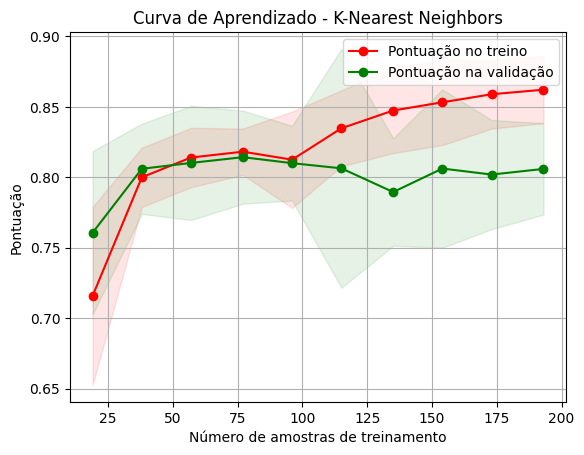

Plotando curva de aprendizado para Random Forest...


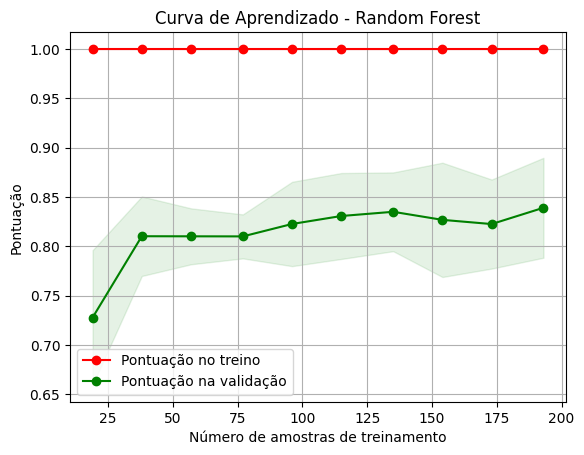

In [67]:
# Bibliotecas necessárias para as curvas de aprendizado
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Função para plotar curvas de aprendizado
def plot_learning_curve(estimator, title, X, y, cv=None, scoring='accuracy'):
    plt.figure()
    plt.title(title)
    plt.xlabel("Número de amostras de treinamento")
    plt.ylabel("Pontuação")

    # Obter as curvas de aprendizado
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )

    # Calcular médias e desvios padrão
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plotar curva de aprendizado
    plt.grid()

    # Curvas de treino
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Pontuação no treino")

    # Curvas de validação
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Pontuação na validação")

    plt.legend(loc="best")
    return plt

# Avaliar as curvas de aprendizado para os modelos ajustados
for model_name, model in best_estimators.items():
    print(f"Plotando curva de aprendizado para {model_name}...")
    plot_learning_curve(
        model, f"Curva de Aprendizado - {model_name}", X_train, y_train, cv=5, scoring='accuracy'
    )
    plt.show()

A função ''plot_learning_curve'' usa a função ''learning_curve'' do Sklearn para calcular as pontuações no conjunto de treino e validação para diferentes tamanhos de treinamento. Calcula a média e o desvio padrão para evitar ruídos nas curvas, plota as curvas de treino e validação.




  As curvas de aprendizado são geradas para cada modelo em ''best_estimators'' e a pontuação usada é accuracy por padrão, podendo ser ajustada.

Resultado das possíveis melhorias:

*   Overfitting: pontuação alta no treino e baixa no teste, sem convergência;

